In [132]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

db_dir = "./dataset"
db_file = "/FPA_FOD_20170508.sqlite"
db_path = db_dir + db_file

conn = sqlite3.connect(db_path)
query = "SELECT FOD_ID, FIRE_NAME, DISCOVERY_DATE, DISCOVERY_TIME, STAT_CAUSE_DESCR, CONT_DATE, FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, STATE from fires"

df = pd.read_sql_query(query , conn)

conn.close()

In [133]:
df.columns = df.columns.str.lower()
df.tail(10)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state
1880455,300348311,COVE,2457201.5,2042,Miscellaneous,2457202.5,5.30,B,37.936253,-120.613743,CA
1880456,300348328,RANCHO 6,2457187.5,1714,Missing/Undefined,2457187.5,2.22,B,40.019907,-122.391398,CA
1880457,300348354,CARR,2457295.5,2357,Arson,2457296.5,1.00,B,40.588583,-123.069617,CA
1880458,300348361,1-64,2457235.5,1331,Lightning,2457240.5,4.00,B,40.244833,-123.544167,CA
1880459,300348362,BENNETT,2457170.5,1420,Miscellaneous,2457170.5,0.50,B,38.415608,-122.660044,CA
1880460,300348363,ODESSA 2,2457291.5,1726,Missing/Undefined,2457291.5,0.01,A,40.481637,-122.389375,CA
1880461,300348373,None,2457300.5,0126,Miscellaneous,NaN,0.20,A,37.617619,-120.938570,CA
1880462,300348375,None,2457144.5,2052,Missing/Undefined,NaN,0.10,A,37.617619,-120.938570,CA
1880463,300348377,None,2457309.5,2309,Missing/Undefined,NaN,2.00,B,37.672235,-120.898356,CA
1880464,300348399,BARKER BL BIG_BEAR_LAKE_,2457095.5,2128,Miscellaneous,NaN,0.10,A,34.263217,-116.830950,CA


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   fod_id            int64  
 1   fire_name         object 
 2   discovery_date    float64
 3   discovery_time    object 
 4   stat_cause_descr  object 
 5   cont_date         float64
 6   fire_size         float64
 7   fire_size_class   object 
 8   latitude          float64
 9   longitude         float64
 10  state             object 
dtypes: float64(5), int64(1), object(5)
memory usage: 157.8+ MB


In [135]:
df.isnull().sum()

fod_id                   0
fire_name           957189
discovery_date           0
discovery_time      882638
stat_cause_descr         0
cont_date           891531
fire_size                0
fire_size_class          0
latitude                 0
longitude                0
state                    0
dtype: int64

In [136]:
df["fire_name"] = df["fire_name"].fillna("NOT_NAMED")

#fill null values of discovery time
df["discovery_time"] = df["discovery_time"].astype(float)
mean_discovery_time = df["discovery_time"].mean()
df["discovery_time"] = df["discovery_time"].fillna(mean_discovery_time)


df.sample(10)


,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state
342408,351076,0306,2454269.5,1115.000000,Miscellaneous,2454269.5,0.1,A,43.658940,-121.529890,OR
61057,61674,NOT_NAMED,2449542.5,1820.000000,Lightning,2449542.5,0.1,A,45.785000,-113.931667,MT
864079,986308,NOT_NAMED,2451770.5,1453.014326,Equipment Use,NaN,3.0,B,34.517200,-92.860000,AR
983531,1112336,NOT_NAMED,2451061.5,1453.014326,Miscellaneous,NaN,0.1,A,29.060000,-82.090000,FL
1212598,1469774,OLD TWO STRIKE CHURC,2455372.5,255.000000,Miscellaneous,2455372.5,0.2,A,43.209830,-100.909310,SD
374240,386751,NOT_NAMED,2452742.5,1453.014326,Equipment Use,NaN,3.0,B,42.060000,-91.760000,IA
1368030,15038235,NOT_NAMED,2454928.5,1550.000000,Miscellaneous,NaN,18.0,C,35.643830,-92.440000,AR
1848431,300275085,NER-20151024-004,2457319.5,1453.014326,Miscellaneous,2457319.5,0.1,A,33.848517,-86.805508,AL
8187,8229,KNIFE,2453882.5,1414.000000,Equipment Use,NaN,560.0,E,35.132778,-111.399444,AZ
1800885,300213555,COOK TANK 1,2457055.5,1248.000000,Equipment Use,2457055.5,0.1,A,32.232200,-104.308297,NM


In [137]:
#making new column burning_days for the no. of days the fire continued
df["burning_days"] = df["cont_date"] - df["discovery_date"]
mean_burning_days = df["burning_days"].mean()
df["burning_days"] = df["burning_days"].fillna(mean_burning_days)
df["burning_days"] = df["burning_days"].round()

#then adding burning days to discovery date to fill NaN values
df["cont_date"] = df["discovery_date"] + df["burning_days"]

df.isnull().sum()

fod_id              0
fire_name           0
discovery_date      0
discovery_time      0
stat_cause_descr    0
cont_date           0
fire_size           0
fire_size_class     0
latitude            0
longitude           0
state               0
burning_days        0
dtype: int64

In [138]:
# Convert Julian date to datetime
df['discovery_date'] = pd.to_datetime(df['discovery_date'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['cont_date'] = pd.to_datetime(df['cont_date'] - pd.Timestamp(0).to_julian_date(), unit='D')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fod_id            int64         
 1   fire_name         object        
 2   discovery_date    datetime64[ns]
 3   discovery_time    float64       
 4   stat_cause_descr  object        
 5   cont_date         datetime64[ns]
 6   fire_size         float64       
 7   fire_size_class   object        
 8   latitude          float64       
 9   longitude         float64       
 10  state             object        
 11  burning_days      float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 172.2+ MB


In [139]:

df['fire_year'] = pd.DatetimeIndex(df.discovery_date).year
df['fire_month'] = pd.DatetimeIndex(df.discovery_date).month
df['fire_day'] = pd.DatetimeIndex(df.discovery_date).day
df['fire_weekday'] = pd.DatetimeIndex(df.discovery_date).weekday

num_fire_per_year = df['fire_year'].value_counts().sort_index()

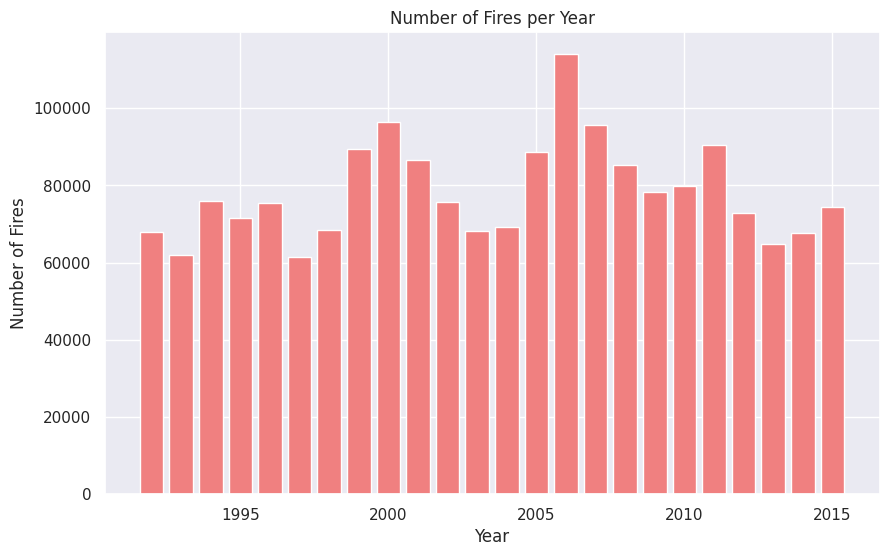

In [140]:
plt.figure(figsize=(10, 6))
plt.bar(num_fire_per_year.index, num_fire_per_year.values, color='lightcoral')

plt.title('Number of Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks()
plt.show()

#graph shows the the trend of number of fires per year

In [141]:
avgfiresize_peryear = df[['fire_year', 'fire_size']].groupby('fire_year').mean()
avgfiresize_peryear

,fire_size
fire_year,
1992,32.364222
1993,35.357903
1994,54.196748
1995,28.676755
1996,79.460604
1997,52.313024
1998,29.414983
1999,68.039342
2000,79.234760


<Axes: xlabel='fire_year'>

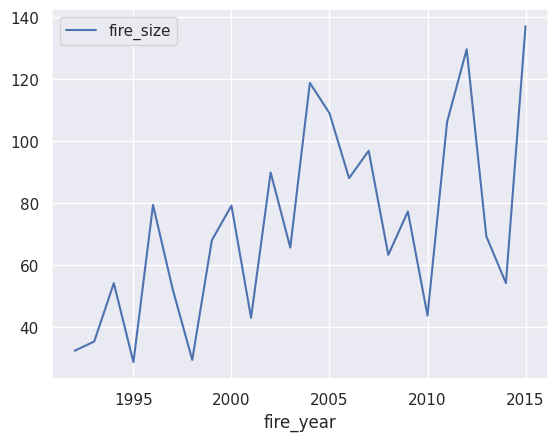

In [142]:
avgfiresize_peryear.plot()

In [143]:
num_fires_with_fire_class = df.groupby('fire_size_class').size()
num_fires_with_fire_class

fire_size_class
A    666919
B    939376
C    220077
D     28427
E     14107
F      7786
G      3773
dtype: int64

'\nhere ,FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (\n    A=greater than 0 but less than or equal to 0.25 acres, \n    B=0.26-9.9 acres, \n    C=10.0-99.9 acres, \n    D=100-299 acres, \n    E=300 to 999 acres,\n    F=1000 to 4999 acres, \n    G=5000+ acres)\n'

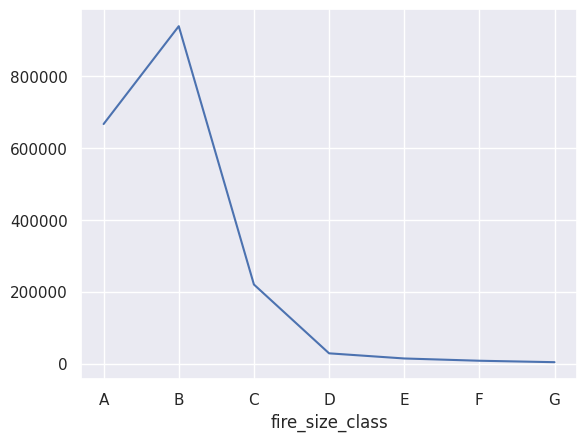

In [144]:
num_fires_with_fire_class.plot()
'''
here ,FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (
    A=greater than 0 but less than or equal to 0.25 acres, 
    B=0.26-9.9 acres, 
    C=10.0-99.9 acres, 
    D=100-299 acres, 
    E=300 to 999 acres,
    F=1000 to 4999 acres, 
    G=5000+ acres)
'''
#AND the graph reflect that there were less number of fires in for higher grades

In [145]:
fires_peryear_byclass = df.groupby(['fire_year', 'fire_size_class']).size().reset_index().rename(columns={0:'number_of_fires'})
fires_peryear_byclass

,fire_year,fire_size_class,number_of_fires
0,1992,A,25540
1,1992,B,32981
2,1992,C,7955
3,1992,D,876
4,1992,E,368
...,...,...,...
163,2015,C,7720
164,2015,D,1098
165,2015,E,568
166,2015,F,336


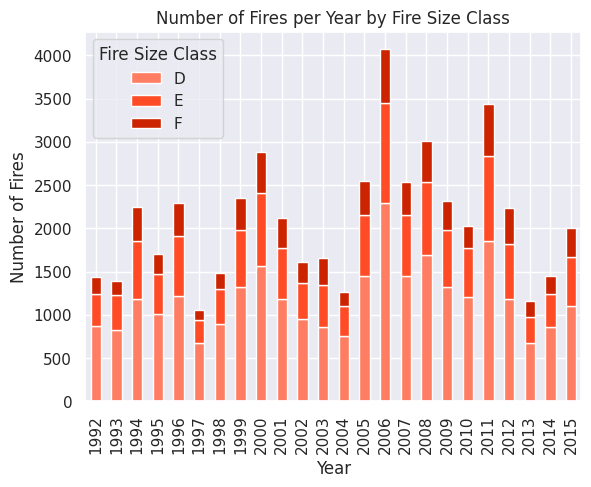

In [146]:
pivot_df = fires_peryear_byclass.pivot(index='fire_year', columns='fire_size_class', values='number_of_fires')
colors = ["#FF7D62", "#FF4C27", "#CC2300"]
pivot_df.loc[:,['D','E','F']].plot(kind='bar', color=colors, stacked=True)

plt.title('Number of Fires per Year by Fire Size Class')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Fire Size Class')
plt.xticks()  
plt.show()  

#here graph shows number of fires for eack year for grade D,E,F 
#we can observe that highesh num of fires were in year 2006 

In [147]:
fires_per_year_per_state = df.groupby(['fire_year', 'state']).size().reset_index().rename(columns={0:'number_of_fires'})
fires_per_year_per_state

,fire_year,state,number_of_fires
0,1992,AK,481
1,1992,AL,93
2,1992,AR,128
3,1992,AZ,3494
4,1992,CA,10833
...,...,...,...
1209,2015,VT,87
1210,2015,WA,1741
1211,2015,WI,965
1212,2015,WV,685


In [148]:
pivot_df = fires_years_state.pivot(index='fire_year', columns='state', values='number_of_fires')
pivot_df

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
fire_year,,,,,,,,,,,,,,,,,,,,,
1992,481.0,93.0,128.0,3494.0,10833.0,1322.0,202.0,3.0,3.0,4222.0,...,554.0,55.0,1168.0,1092.0,43.0,1.0,1774.0,1287.0,701.0,746.0
1993,861.0,137.0,151.0,4639.0,8270.0,1244.0,103.0,7.0,1.0,4548.0,...,438.0,65.0,1457.0,710.0,54.0,1.0,986.0,884.0,847.0,269.0
1994,640.0,3452.0,167.0,4519.0,8654.0,2515.0,290.0,4.0,2.0,3530.0,...,882.0,73.0,907.0,1663.0,78.0,6.0,2022.0,1973.0,1010.0,919.0
1995,418.0,4230.0,240.0,4502.0,7381.0,1517.0,110.0,5.0,5.0,3186.0,...,665.0,106.0,1648.0,1151.0,1550.0,2.0,1213.0,1640.0,1241.0,530.0
1996,718.0,4048.0,224.0,3761.0,9173.0,1405.0,27.0,NaN,NaN,4697.0,...,839.0,56.0,2843.0,1666.0,824.0,NaN,1091.0,1463.0,651.0,1032.0
1997,721.0,2591.0,1040.0,2250.0,7930.0,722.0,83.0,3.0,5.0,3912.0,...,607.0,1394.0,770.0,862.0,1133.0,2.0,999.0,1675.0,719.0,195.0
1998,408.0,3566.0,1156.0,2679.0,6864.0,765.0,30.0,13.0,NaN,4813.0,...,816.0,1836.0,2026.0,873.0,1168.0,2.0,1477.0,1611.0,1006.0,198.0
1999,482.0,4501.0,2224.0,2736.0,8910.0,756.0,297.0,8.0,2.0,5484.0,...,1409.0,3454.0,1775.0,1282.0,1583.0,3.0,1475.0,1604.0,1949.0,305.0
2000,364.0,6264.0,2363.0,3859.0,6977.0,1619.0,126.0,NaN,1.0,6499.0,...,2271.0,2674.0,2627.0,1857.0,988.0,NaN,1226.0,1578.0,1106.0,571.0


<Axes: xlabel='fire_year'>

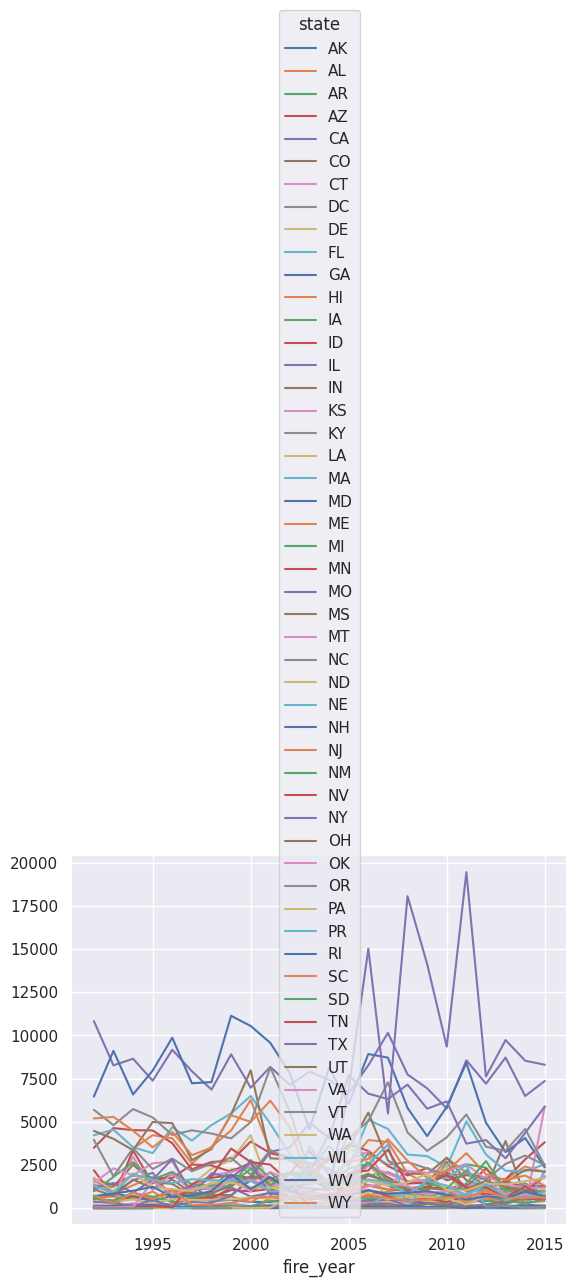

In [149]:
pivot_df.plot()
#this does not give useful insight

In [150]:
#so instead we sort only by state
fires_state = df['state'].value_counts().head(25)
fires_state

state
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
Name: count, dtype: int64

<Axes: xlabel='state'>

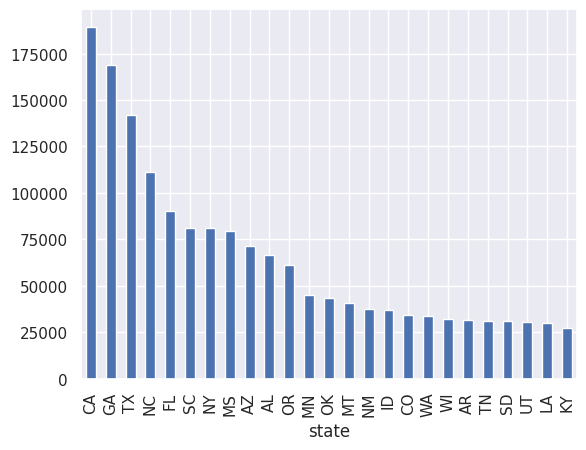

In [151]:
fires_state.plot(x = 'state', kind = 'bar')

NameError: name 'file' is not defined

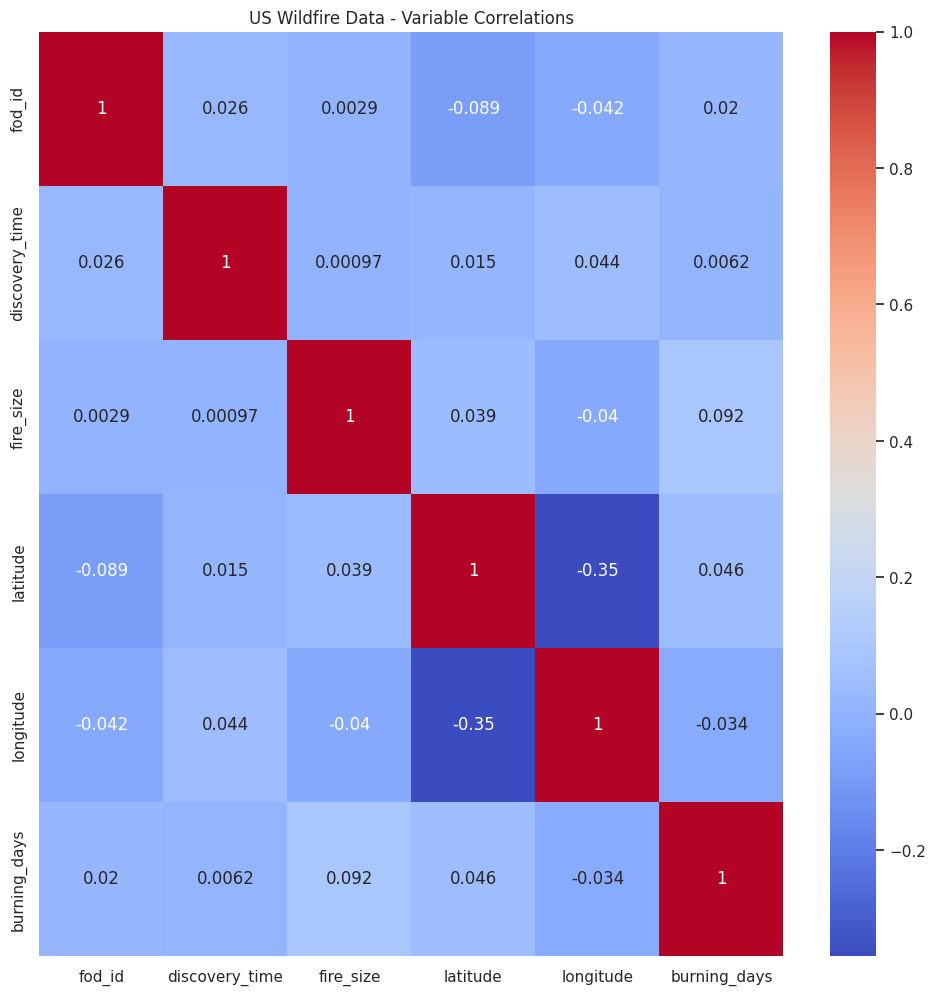

In [153]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
with sns.axes_style("white"):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('US Wildfire Data - Variable Correlations', fontsize=12)
plt.xlabel('')  
plt.ylabel('')  
plt.show()